## Hotel Data Analysis

### Importing Libraries to work with Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
hotels = pd.read_csv("hotel_booking_data.csv")

In [4]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### How many rows & columns are there.

In [6]:
len(hotels)

119390

In [7]:
len(hotels.columns)

36

### Taking a look at missing data in the dataset.

In [8]:
hotels.isna().sum()
#Company column has the most missing data.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Removing 'company' column as it contains too many null values.


In [9]:
hotels.drop("company",axis=1,inplace=True)

### 🌍 Analyzing Top 5 Countries with Highest Number of Bookings.

In [10]:
hotels['country'].value_counts()[:5]
#PRT,GBR,FRA,ESP,DEU are the 5 most common country codes

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

### Finding the name of the customer who paid the highest ADR, also what was the ADR.

In [11]:
#2 different ways to get the answer.
hotels[hotels['adr']==hotels['adr'].max()][['adr','name']]

hotels.sort_values('adr',ascending=False)[:1][['adr','name']]

,adr,name
48515,5400.0,Daniel Walter


### Finding the mean ADR across all the hotel stays in the dataset.

In [12]:
round(hotels['adr'].mean(),2)

101.83

### 🛏️ Average Number of Nights per Stay.

In [13]:
hotels['nights_stayed'] = hotels['stays_in_week_nights'] + hotels['stays_in_weekend_nights']
round(hotels['nights_stayed'].mean(),2)

3.43

### Calculating Average Total Cost per Stay Across All Bookings.

In [14]:
hotels['total_spend'] = hotels['adr'] * hotels['nights_stayed']
round(hotels['total_spend'].mean(),2)

357.85

### 🎯Retrieving Guests with Exactly 5 Special Requests.

In [15]:
hotels[hotels['total_of_special_requests']==5][['name','email','total_of_special_requests']]

,name,email,total_of_special_requests
7860,Amanda Harper,Amanda.H66@yahoo.com,5
11125,Laura Sanders,Sanders_Laura@hotmail.com,5
14596,Tommy Ortiz,Tommy_O@hotmail.com,5
14921,Gilbert Miller,Miller.Gilbert@aol.com,5
14922,Timothy Torres,TTorres@protonmail.com,5
24630,Jennifer Weaver,Jennifer_W@aol.com,5
27288,Crystal Horton,Crystal.H@mail.com,5
27477,Brittney Burke,Burke_Brittney16@att.com,5
29906,Cynthia Cabrera,Cabrera.Cynthia@xfinity.com,5
29949,Sarah Floyd,Sarah_F@gmail.com,5


### 🔁Calculating Percentage of Repeat Guests.

In [16]:
round((hotels['is_repeated_guest'].sum()/len(hotels))*100,2)

3.19

### 👥 Most Frequent Guest Last Names (Top 5).

In [17]:
hotels['Last Name'] = hotels['name'].str.split().str[-1]
hotels['Last Name'].value_counts()[:5]
#Single Line Code : hotels['name'].apply(lambda name: name.split()[-1]).value_counts().head()

Smith       2503
Johnson     1990
Williams    1618
Jones       1434
Brown       1423
Name: Last Name, dtype: int64

### 👶 Identifying Guests Booking the Most Children and Babies.


In [18]:

def total_kid(children,babies):
    return children + babies

hotels['total_kids'] = np.vectorize(total_kid)(hotels['children'],hotels['babies'])

In [19]:
hotels.sort_values('total_kids',ascending=False).head(3)[['name','total_kids','children','babies']]

,name,total_kids,children,babies
328,Jamie Ramirez,10.0,10.0,0
46619,Nicholas Parker,10.0,0.0,10
78656,Marc Robinson,9.0,0.0,9


### 📞 Most Frequent Phone Number Area Codes (Top 3).

In [20]:
hotels['phone-number'].str[:3].value_counts().head(3)

799    168
185    167
541    166
Name: phone-number, dtype: int64

### 📅 Number of Hotel Arrivals in the First Half of the Month.

In [21]:
len(hotels[(hotels['arrival_date_day_of_month'] >= 1) & (hotels['arrival_date_day_of_month'] <=15)])
#ALternate way : len(hotels[hotels['arrival_date_day_of_month'].between(1,15)])

58152

### 📊 Number of Hotel Arrivals for Each Day of the Week.

In [22]:
def date_convert(day,month,year):
    return f"{day}-{month}-{year}"

In [23]:
hotels['date'] = np.vectorize(date_convert)(hotels['arrival_date_day_of_month'],hotels['arrival_date_month'],hotels['arrival_date_year'])

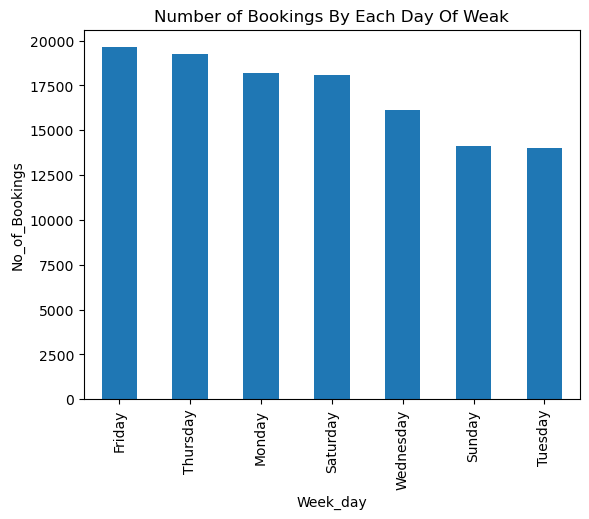

In [32]:
hotels['date'] = pd.to_datetime(hotels['date'])
week_day_counts = hotels['date'].dt.day_name().value_counts()
plt.figure()
week_day_counts.plot(kind="bar")
plt.xlabel('Week_day')
plt.ylabel("No_of_Bookings")
plt.title("Number of Bookings By Each Day Of Weak")
plt.show()

## Advance Analysis

### Overall Cancellation Rate

In [25]:
hotels['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [26]:
cancellation_rate = round(hotels['is_canceled'].sum()/len(hotels)*100,2)
cancellation_rate

37.04

### Cancellation Rate by hotel type

In [27]:
cancellation_rate_city_hotel = round(hotels[hotels['hotel'] == 'City Hotel']['is_canceled'].sum()/len(hotels['hotel']=='City Hotel')*100,2)
cancellation_rate_city_hotel

27.73

In [28]:
cancellation_rate_Resort_hotel = round(hotels[hotels['hotel'] == 'Resort Hotel']['is_canceled'].sum()/len(hotels['hotel']=='Resort Hotel')*100,2)
cancellation_rate_Resort_hotel

9.32

### ADR Effects On Cancellation Rate

In [29]:
hotels[hotels['is_canceled']==1]['adr'].mean()

104.96433316751087

In [30]:
hotels[hotels['is_canceled']==0]['adr'].mean()

99.98769297288668

### Seasonality & Monthly Booking Trends

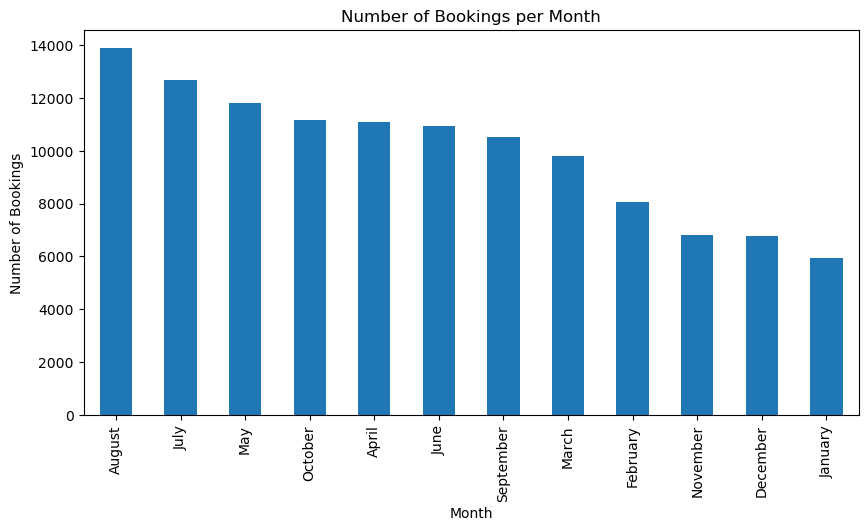

In [31]:
monthly_counts = hotels['date'].dt.month_name().value_counts()

plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar')
plt.ylabel('Number of Bookings')
plt.xlabel('Month')
plt.title('Number of Bookings per Month')
plt.show()

### 🧮 Count of Bookings by Market Segment

In [44]:
hotels['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [66]:
Bookings_market_segment = hotels['market_segment'].value_counts()
Bookings_market_segment

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

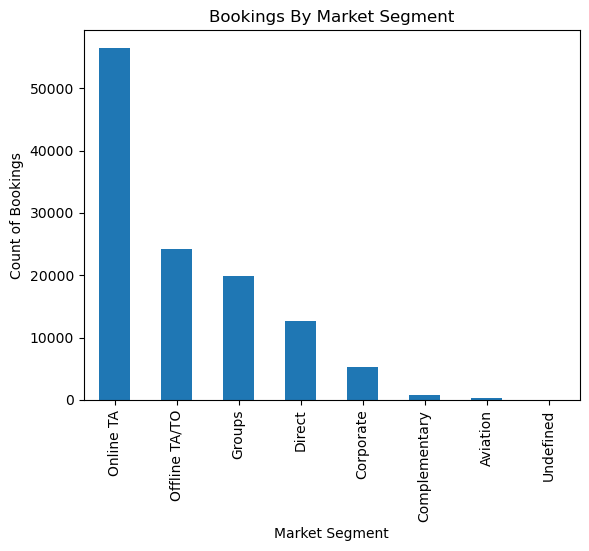

In [67]:
plt.figure()
Bookings_market_segment.plot(kind="bar")
plt.title("Bookings By Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Count of Bookings")
plt.show()

### 💼 Revenue Generated per Segment

In [89]:
revenue_by_market_segment = hotels.groupby("market_segment").sum()['total_spend']
revenue_by_market_segment

C:\Users\ys274\AppData\Local\Temp\ipykernel_12724\2065230231.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_by_market_segment = hotels.groupby("market_segment").sum()['total_spend']


market_segment
Aviation            87446.36
Complementary        5082.52
Corporate          774295.26
Direct            5093028.39
Groups            4669636.74
Offline TA/TO     8151912.73
Online TA        23942047.53
Undefined              48.00
Name: total_spend, dtype: float64

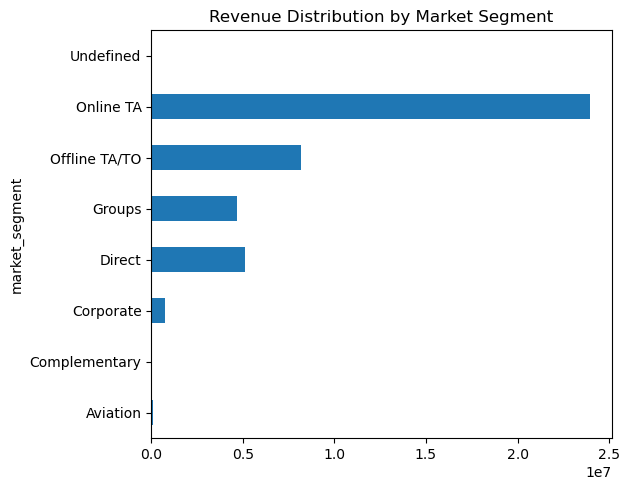

In [90]:
plt.figure()
revenue_by_market_segment.plot(kind='barh')
plt.tight_layout()
plt.title('Revenue Distribution by Market Segment')
plt.show()